In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf 
import PIL

In [44]:
import os
from pathlib import Path
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model, model_from_json

# Image data preprocessing

In [39]:

input_path = Path("./train")

dirs = input_path.glob("*")

image_data=[]
labels = []
image_path=[]

label_dict = {"alien":0,"predator":1}
label2alien={0:'alien',1:'predator'}


for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    # Iterate over folder_dir and pick all images
    for img_path in folder_dir.glob("*.jpg"):
        
        img = image.load_img(img_path,target_size=(100,100))
        
        img_array = image.img_to_array(img)
        
        image_data.append(img_array)
    
        labels.append(label_dict[label])
        
        cnt+=1
        
    
print(cnt)

train\alien
train\predator
347


# Visualization of data set

In [30]:
print(len(image_data))
print(len(labels))

694
694


# Scalling the images

In [33]:
X=np.array(image_data)
X=X/255.0

y=np.array(labels)

In [35]:
print(X.shape)
print(y.shape)

(694, 100, 100, 3)
(694,)


#  Draw images

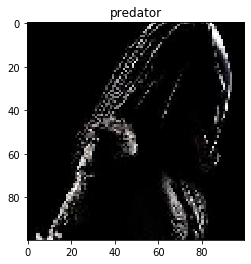

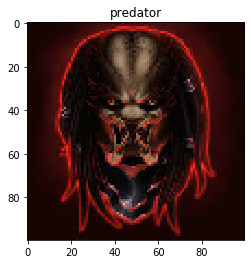

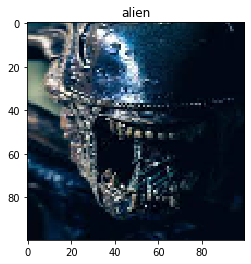

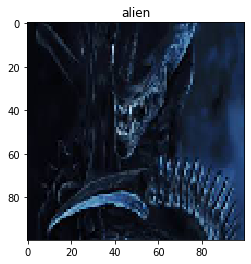

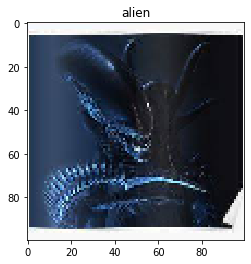

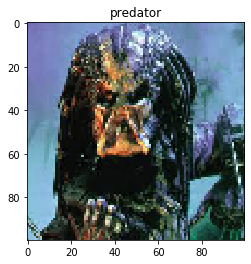

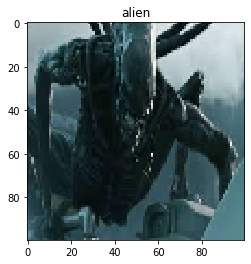

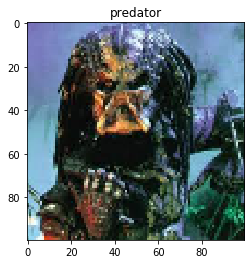

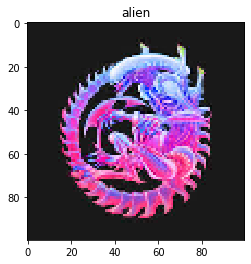

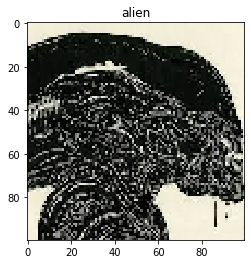

In [43]:
def drawImg(img,label):
    plt.title(label2alien[label])
    plt.imshow(img)
    plt.show()
    
for i in range(10):
    idx=np.random.randint(694)
    drawImg(X[idx]/255.0,y[idx])    

# Importing VGG16

In [45]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=[100,100] + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 40s 1us/step


In [46]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [52]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [53]:
# tell the model what cost and optimization method to use
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fitting the model

In [56]:
history = model.fit(X_train, y_train,batch_size=32, epochs = 10,validation_split=.1)

Train on 499 samples, validate on 56 samples
Epoch 1/10
499/499 [==============================] - 12s 25ms/step - loss: 0.3122 - accuracy: 0.8737 - val_loss: 0.2762 - val_accuracy: 0.9107
Epoch 2/10
499/499 [==============================] - 13s 26ms/step - loss: 0.2861 - accuracy: 0.9018 - val_loss: 0.2732 - val_accuracy: 0.9107
Epoch 3/10
499/499 [==============================] - 13s 26ms/step - loss: 0.2694 - accuracy: 0.9118 - val_loss: 0.2803 - val_accuracy: 0.8929
Epoch 4/10
499/499 [==============================] - 13s 27ms/step - loss: 0.2594 - accuracy: 0.9098 - val_loss: 0.3646 - val_accuracy: 0.8036
Epoch 5/10
499/499 [==============================] - 13s 27ms/step - loss: 0.2570 - accuracy: 0.9078 - val_loss: 0.3079 - val_accuracy: 0.8750
Epoch 6/10
499/499 [==============================] - 14s 27ms/step - loss: 0.2345 - accuracy: 0.9118 - val_loss: 0.2669 - val_accuracy: 0.8750
Epoch 7/10
499/499 [==============================] - 14s 27ms/step - loss: 0.2277 - accura

In [59]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


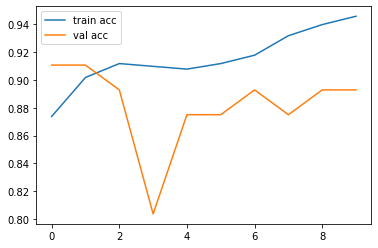

In [61]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [62]:
from keras.models import load_model

model.save('model_vgg19.h5')

# Model accuracy

In [83]:
y_pred= model.predict(X_test)
y_pred = y_pred > 0.5
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('CONFUSION MATRIX :\n ',cm)
print('accuracy :\n',accuracy_score(y_test, y_pred))

CONFUSION MATRIX :
  [[63  5]
 [12 59]]
accuracy :
 0.8776978417266187


# Visualizing Test data

ACTUAL Image


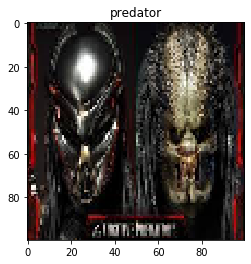

Prediction is :  predator


ACTUAL Image


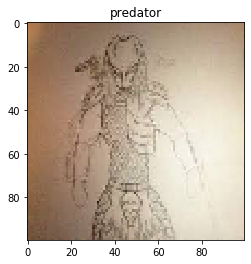

Prediction is :  alien


ACTUAL Image


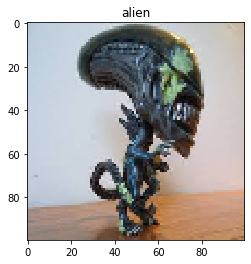

Prediction is :  alien


ACTUAL Image


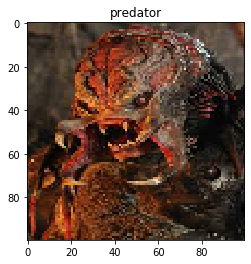

Prediction is :  predator


ACTUAL Image


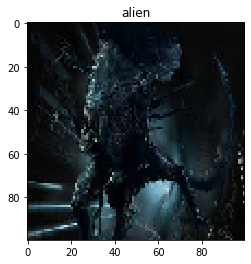

Prediction is :  alien


ACTUAL Image


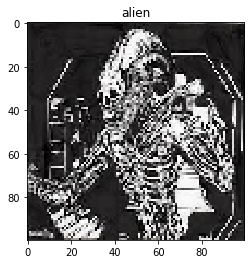

Prediction is :  predator


ACTUAL Image


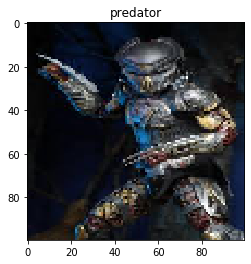

Prediction is :  predator


ACTUAL Image


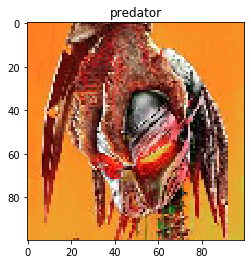

Prediction is :  predator


ACTUAL Image


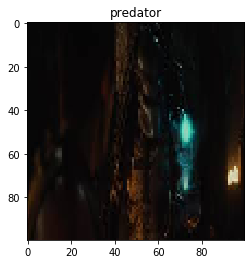

Prediction is :  predator


ACTUAL Image


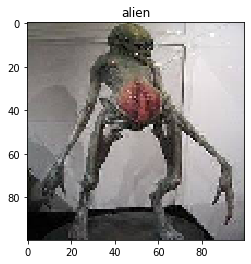

Prediction is :  alien




In [90]:
model = keras.models.load_model("model_vgg19.h5")

for i in range(10):
    num = np.random.randint(135)
    pred = model.predict(X_test[num].reshape(-1,100,100,3))
    print('ACTUAL Image')
    drawImg(X_test[num],y_test[num]) 
    print('Prediction is : ',label2alien[int(pred>0.5)])
    print('\n')

# Prediction for Test folder data

In [94]:

input_path = Path("./validation")

dirs = input_path.glob("*")

image_data=[]
labels = []
image_path=[]

label_dict = {"alien":0,"predator":1}
label2alien={0:'alien',1:'predator'}


for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    # Iterate over folder_dir and pick all images
    for img_path in folder_dir.glob("*.jpg"):
        
        img = image.load_img(img_path,target_size=(100,100))
        
        img_array = image.img_to_array(img)
        
        image_data.append(img_array)
    
        labels.append(label_dict[label])
        
        cnt+=1
        
    
print(cnt)


X_validation=np.array(image_data)/255.0
y_validation=np.array(labels)

validation\alien
validation\predator
100


In [95]:
y_pred= model.predict(X_validation)
y_pred = y_pred > 0.5
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_validation, y_pred)
print('CONFUSION MATRIX :\n ',cm)
print('accuracy :\n',accuracy_score(y_validation, y_pred))

CONFUSION MATRIX :
  [[88 12]
 [15 85]]
accuracy :
 0.865


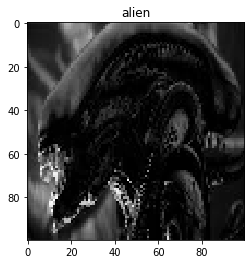

Prediction is :  alien




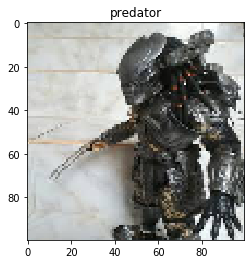

Prediction is :  predator




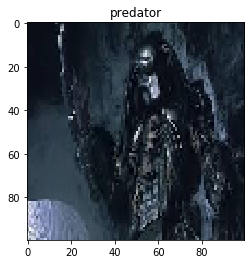

Prediction is :  alien




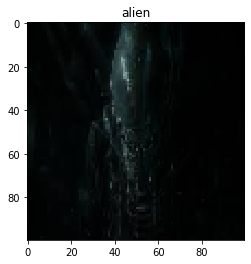

Prediction is :  alien




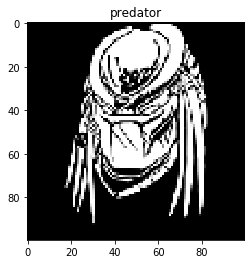

Prediction is :  predator




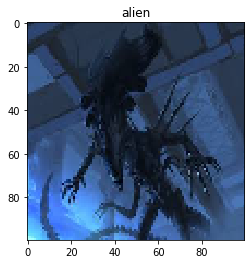

Prediction is :  alien




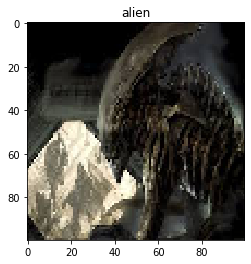

Prediction is :  alien




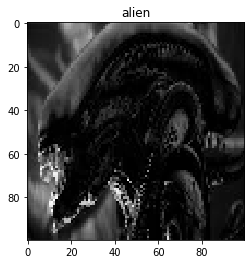

Prediction is :  alien




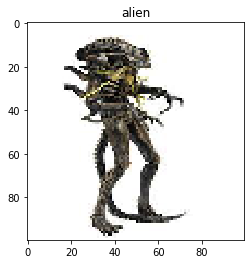

Prediction is :  alien




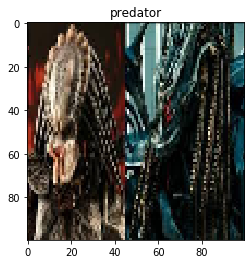

Prediction is :  predator




In [99]:
for i in range(10):
    num = np.random.randint(150)
    pred = model.predict(X_validation[num].reshape(-1,100,100,3))
    
    drawImg(X_validation[num],y_validation[num]) 
    print('Prediction is : ',label2alien[int(pred>0.5)])
    print('\n')